# AllLife Credit Card Customer Segmentation

### `Background:` 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### `Objective:` 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### `Key Questions:`

- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?

### `Data Description:` 
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

In [1]:
#import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore


In [2]:
df=pd.read_excel("Credit Card Customer Data.xlsx") #read the dataset

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
df.shape #shape of the dataset

(660, 7)

In [5]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### Number of Unique Values

In [7]:
df.nunique() #unique values

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

### Value Counts

In [8]:
df["Customer Key"].value_counts()

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

In [9]:
df["Avg_Credit_Limit"].value_counts()

8000      35
6000      31
9000      28
13000     28
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

In [10]:
df["Total_Credit_Cards"].value_counts()

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

In [11]:
df["Total_visits_bank"].value_counts()

2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

In [12]:
df["Total_visits_online"].value_counts()

2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64

In [13]:
df["Total_calls_made"].value_counts()

4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: Total_calls_made, dtype: int64

### Null Values

In [14]:
df.isnull().sum().sum() #Total Number of missing values in  dataframe

0

### Duplicates

In [15]:
##Identify duplicates records in the data
dupes = df.duplicated()
sum(dupes)

0

### Dropping unnecessary columns

In [16]:
df.drop(['Sl_No','Customer Key'], axis=1, inplace=True)
df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


## Dealing with Outliers using IQR

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Avg_Credit_Limit       38000.0
Total_Credit_Cards         3.0
Total_visits_bank          3.0
Total_visits_online        3.0
Total_calls_made           4.0
dtype: float64


In [18]:
np.where((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

(array([  1,   4,   6, 612, 612, 613, 614, 615, 615, 616, 617, 617, 618,
        618, 619, 619, 620, 620, 621, 621, 622, 622, 623, 624, 624, 626,
        626, 627, 627, 628, 629, 630, 630, 631, 631, 632, 633, 633, 634,
        635, 636, 637, 637, 638, 639, 639, 640, 640, 641, 641, 642, 644,
        644, 645, 645, 646, 647, 647, 648, 649, 650, 650, 651, 651, 652,
        653, 654, 654, 655, 656, 657, 657, 658, 658, 659, 659], dtype=int64),
 array([3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0,
        0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3,
        0, 3, 3, 3, 0, 3, 0, 3, 0, 3], dtype=int64))

In [19]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
df_out.shape

(611, 5)

In [20]:
df1 = df.copy()

In [21]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df1 < Q1 - 1.5 * IQR)[0], np.where(df1 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df1.iloc[i,j] = whisker[j]

    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df1 > Q3 + 1.5 * IQR)[0], np.where(df1 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df1.iloc[i,j] = whisker[j]

In [22]:
df1.shape, df.shape

((660, 5), (660, 5))

In [23]:
df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000.0,2,1,1.0,0
1,50000.0,3,0,8.5,9
2,50000.0,7,1,3.0,4
3,30000.0,5,1,1.0,4
4,100000.0,6,0,8.5,3


### Univariate Analysis

<AxesSubplot:xlabel='Total_calls_made', ylabel='Density'>

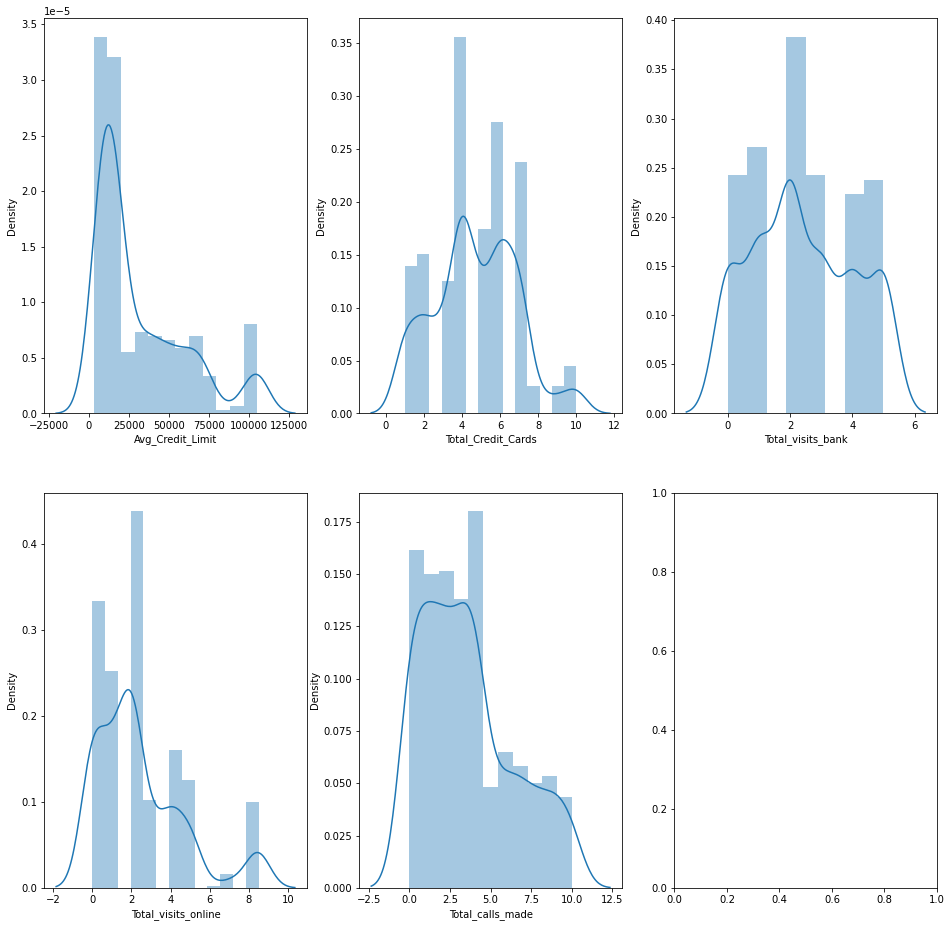

In [24]:
# Distplot

fig, ax2 = plt.subplots(2, 3, figsize=(16, 16))
sns.distplot(df1['Avg_Credit_Limit'],ax=ax2[0][0])
sns.distplot(df1['Total_Credit_Cards'],ax=ax2[0][1])
sns.distplot(df1['Total_visits_bank'],ax=ax2[0][2])
sns.distplot(df1['Total_visits_online'],ax=ax2[1][0])
sns.distplot(df1['Total_calls_made'],ax=ax2[1][1])

##### Insights

From the above plot all columns can be classified into 3 clusters. Some columns like bank vists and total credit card can be classified more than 3 clusters.

### Bivariate

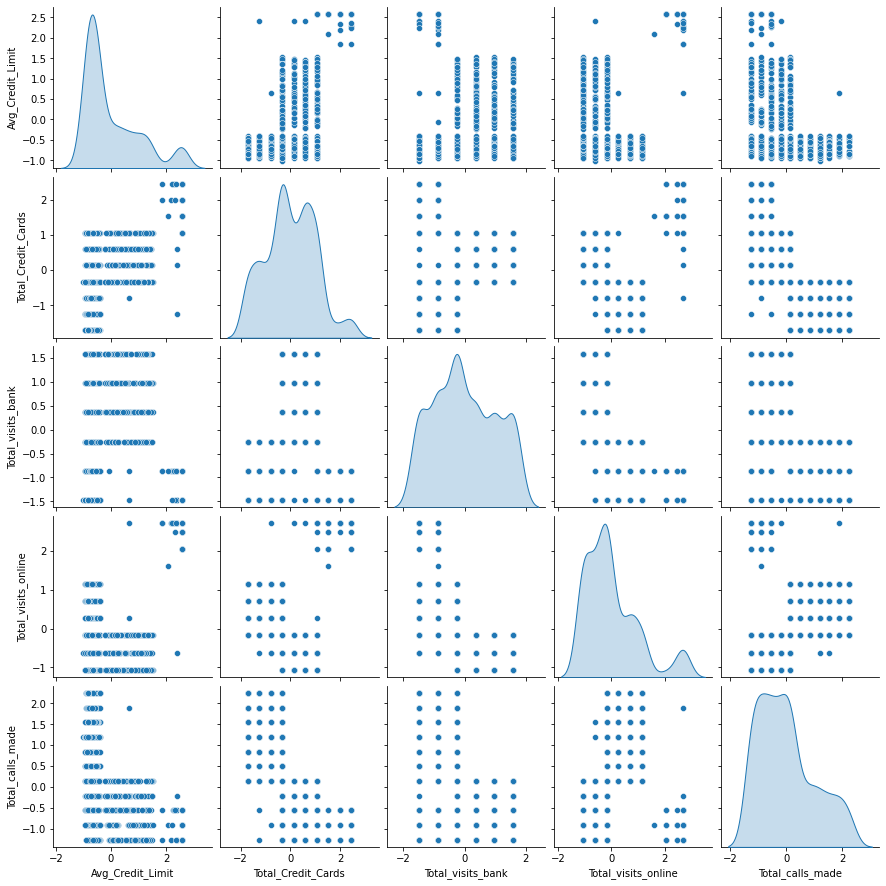

In [25]:
df1Scaled=df1.apply(zscore)
sns.pairplot(df1Scaled,diag_kind='kde')

#### Insights 

There is no linear relationship between any of the plots. 

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}>,
        <AxesSubplot:title={'center':'Total_visits_online'}>],
       [<AxesSubplot:title={'center':'Total_calls_made'}>,
        <AxesSubplot:>]], dtype=object)

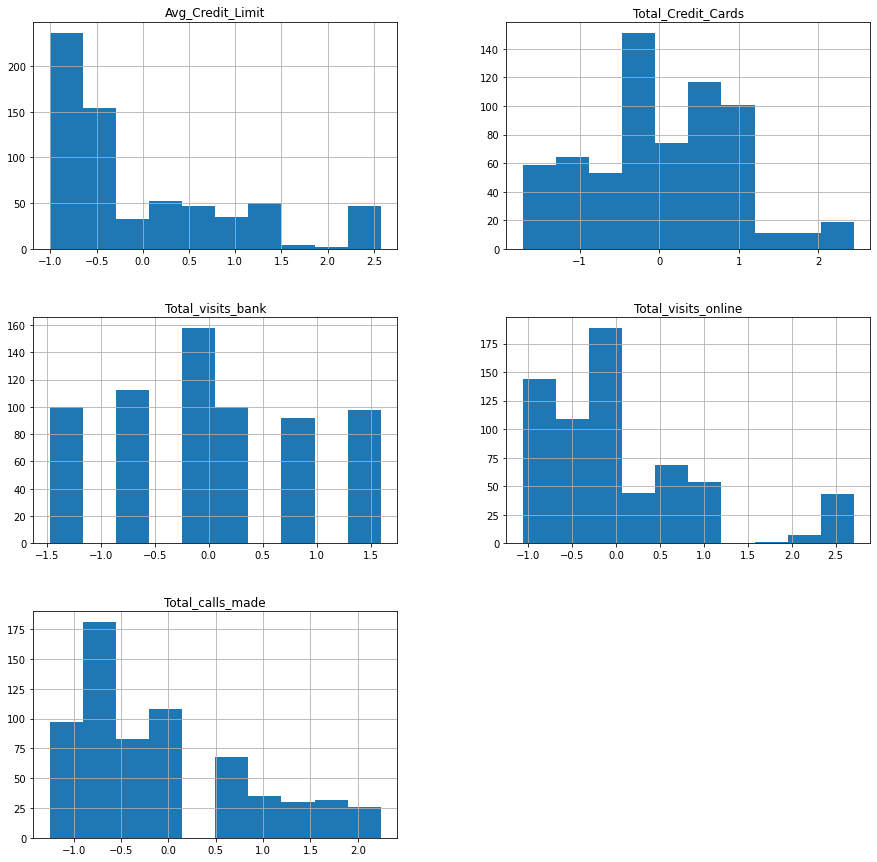

In [26]:
#univariate
# Histogram 

df1Scaled.hist(figsize=(15,15))

Text(0, 0.5, 'Total visits bank')

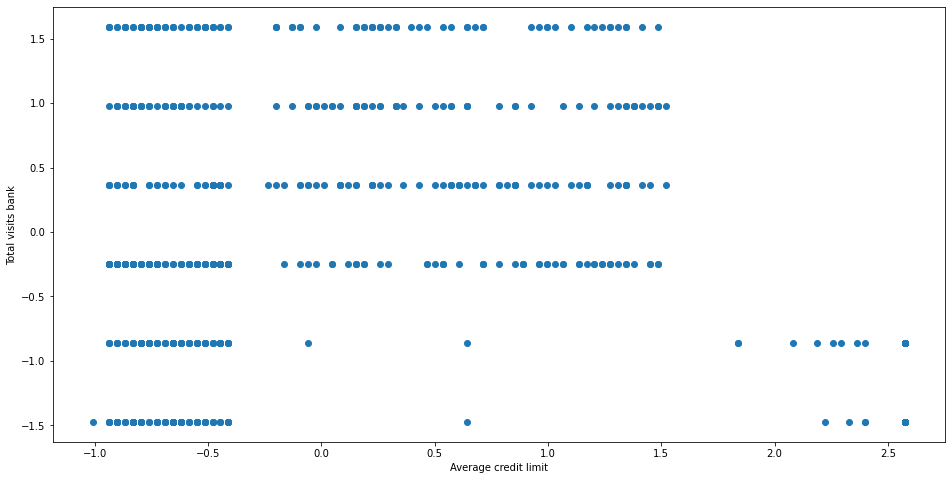

In [27]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1Scaled['Avg_Credit_Limit'],df1Scaled['Total_visits_bank'])  # scatter plot
ax.set_xlabel('Average credit limit')
ax.set_ylabel('Total visits bank')

Text(0, 0.5, 'Total visits online')

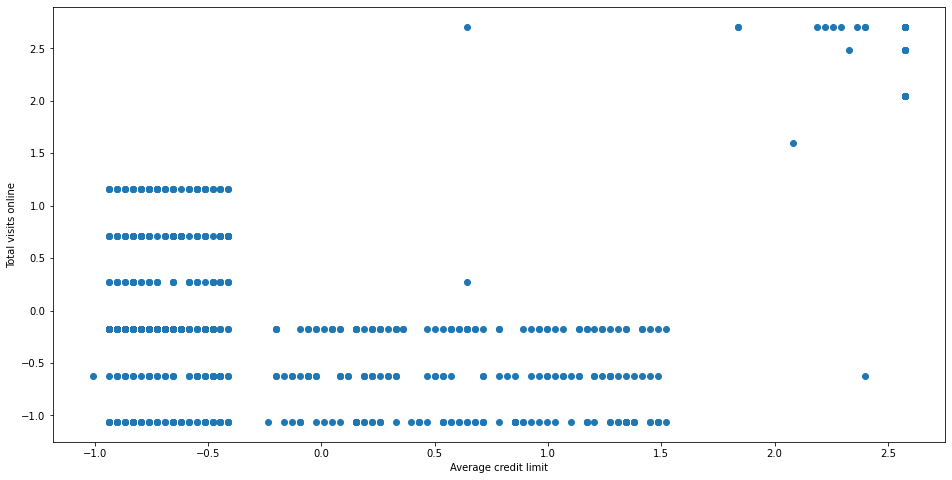

In [28]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1Scaled['Avg_Credit_Limit'],df1Scaled['Total_visits_online'])  # scatter plot
ax.set_xlabel('Average credit limit')
ax.set_ylabel('Total visits online')

Text(0, 0.5, 'Total calls made')

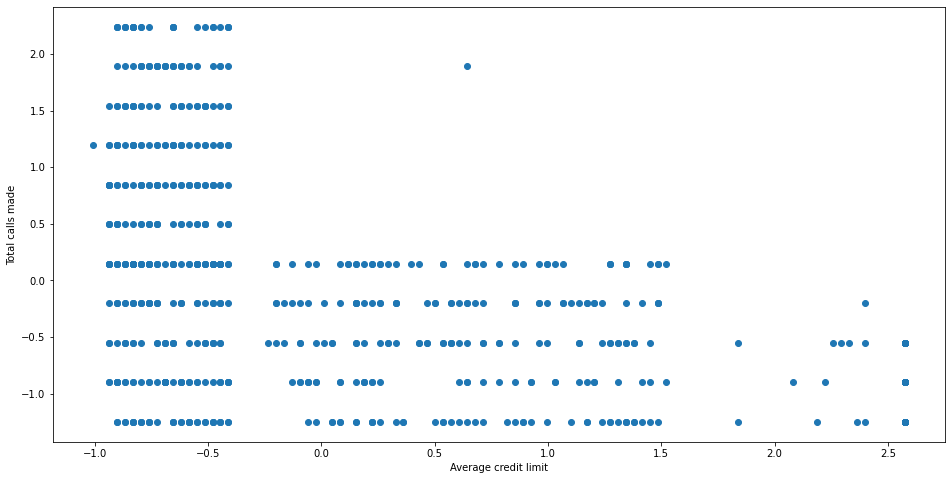

In [29]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1Scaled['Avg_Credit_Limit'],df1Scaled['Total_calls_made'])  # scatter plot
ax.set_xlabel('Average credit limit')
ax.set_ylabel('Total calls made')

- Of all these above there graph we can conclude differentiating the customers into three groups would be ideal.

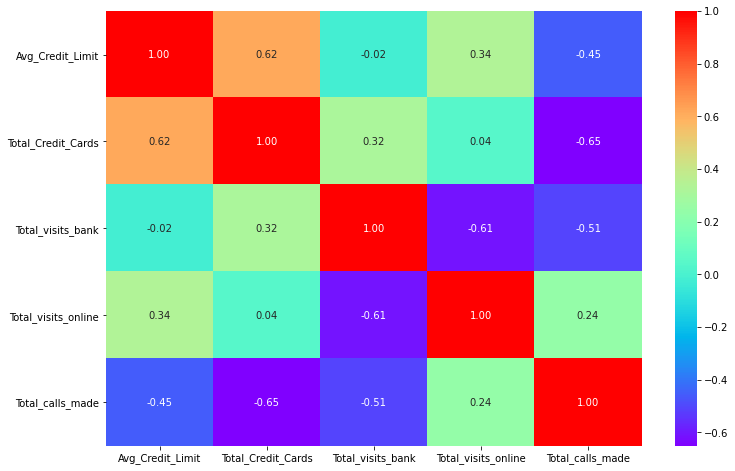

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df1Scaled.corr(),annot=True,fmt='.2f',cmap='rainbow', ) #heatmap
plt.show()

## K Means Clusturing

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

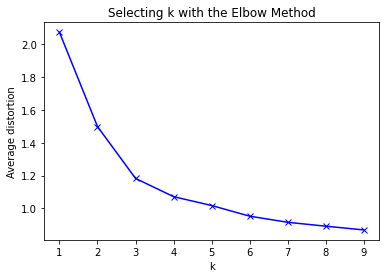

In [31]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df1Scaled)
    prediction=model.predict(df1Scaled)
    meanDistortions.append(sum(np.min(cdist(df1Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df1Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


- from the above plot we can see k=3 looks ideal. since after 3 the plot decreases slowly.

In [32]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(df1Scaled)
prediction=final_model.predict(df1Scaled)

#Append the prediction 
df1["GROUP"] = prediction
df1Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df1.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000.0,2,1,1.0,0,0
1,50000.0,3,0,8.5,9,1
2,50000.0,7,1,3.0,4,0
3,30000.0,5,1,1.0,4,0
4,100000.0,6,0,8.5,3,2


In [33]:
df1Clust = df1.groupby(['GROUP']) #grouping the columns
df1Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.546875,6.870536
2,102660.000000,8.740000,0.600000,8.180000,1.080000


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

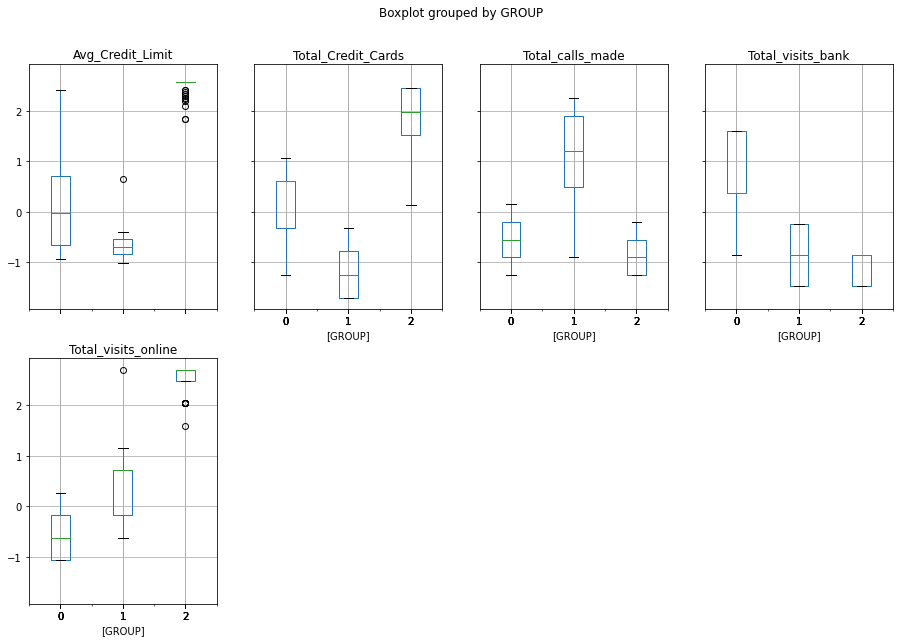

In [34]:
df1Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10)) #boxplot to analyse the clusters

- From the box plot above we can see each group is distinct to each other is every columns.differentiation of 3 clusters works well for this dataset.


In [35]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
s=silhouette_score(df1Scaled,df1Scaled['GROUP'])
print('K Means Clustering silhoutte score:')
s

K Means Clustering silhoutte score:


0.5399468958580531

### K means clustering Observation:

- Silhoutte score of K means clustering is 0.53. Though it is not very close to 1,the score is not bad.


- From the box plot above we can see each group is distinct to each other is every columns.differentiation of 3 clusters works well for this dataset.


- From k means clustering, we can differentiate the dataset into 3 groups.


- group 0 - the average credit limit of those customers is 33,000 and have 5 credit cards.
- group 1 - the average credit limit of those customers is 12,000 and have 2 credit cards.
- group 2 - the average credit limit of those customers is 102,660 and have 8 credit crads.


- group 0 customers visits bank more than online.they also make good no.of calls.
- group 1 customers visits bank rarely.they visit online and make phone calls.
- group 2 customers mostly visits online. they visit bank very rare and less phone calls.


- group 0 customers visits bank most.
- group 1 customers visits online and make phone calls most.
- group 2 customers visits online most.


- group 2 customers has average credit limit of 102,660 and they are very important asset. I recommend bank to improve online support services more efficient to increase this customers.


- group 0 customers has average credit limit of 33,000 and though they spend moderate they visits bank most. I recommend bank to give reward points or cashbacks to make these customers stop buying new credit cards and make more purchase.


- group 1 customers has average credit limit of 12,000 and they visit online and make phone calls. These customers depend on the bank. Increasing the credit limit of this customers will make them do more transactions.


- improving online and bank services will help this customers make more transaction on this bank cards.

## Hierarchial Clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering 

In [37]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [38]:
df1Scaled.drop('GROUP', axis=1, inplace=True)
df1.drop('GROUP', axis=1, inplace=True) #dropping unnecessary columns

In [39]:
model.fit(df1Scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [40]:
df1['labels'] = model.labels_
df1.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000.0,2,1,1.0,0,2
1,50000.0,3,0,8.5,9,0
2,50000.0,7,1,3.0,4,0
3,30000.0,5,1,1.0,4,0
4,100000.0,6,0,8.5,3,1
5,20000.0,3,0,1.0,8,0
6,100000.0,5,0,8.5,2,1
7,15000.0,3,0,1.0,1,0
8,5000.0,2,0,2.0,2,0
9,3000.0,4,0,1.0,7,0


In [41]:
df1Clust2 = df1.groupby(['labels']) #grouping the columns

In [42]:
df1Clust2.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,25725.779967,4.37931,2.553366,1.925287,3.794745
1,102660.000000,8.74000,0.600000,8.180000,1.080000
2,100000.000000,2.00000,1.000000,1.000000,0.000000


In [43]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [44]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [45]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df1Scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df1Scaled))

c

0.8926672966587861

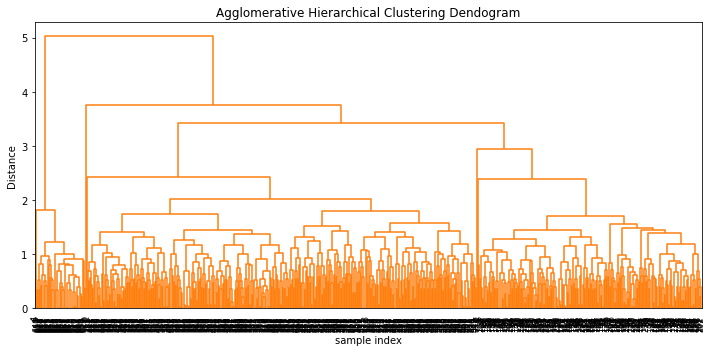

In [46]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

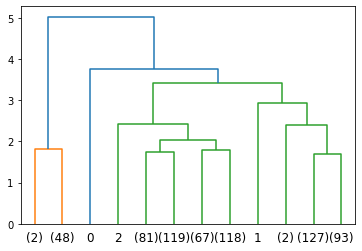

In [47]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [48]:
max_d = 5 #distance measure

### Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [49]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [50]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
s=silhouette_score(df1Scaled,clusters)
s

0.5172480049319457

In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
results_model = pd.DataFrame({'Linkage Method':['average'], 'silhouette score': s},index={'1'})
results_model = results_model[['Linkage Method', 'silhouette score']]
results_model

,Linkage Method,silhouette score
1,average,0.517248


In [52]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df1Scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df1Scaled))

c

0.8207884321476555

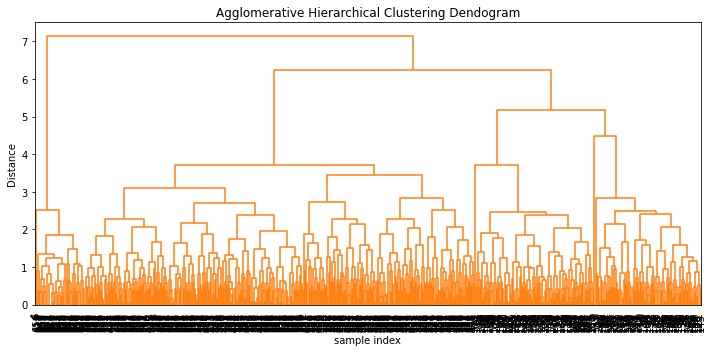

In [53]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

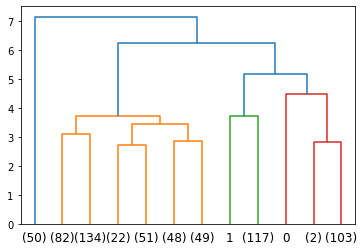

In [54]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [55]:
max_d = 6

In [56]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 2, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [57]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
s=silhouette_score(df1Scaled,clusters)
s

0.5161199988919521

In [58]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Linkage Method':['complete'], 'silhouette score': s},index={'2'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Linkage Method', 'silhouette score']]
results_model

,Linkage Method,silhouette score
1,average,0.517248
2,complete,0.516120


In [59]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df1Scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df1Scaled))

c

0.7702265240776373

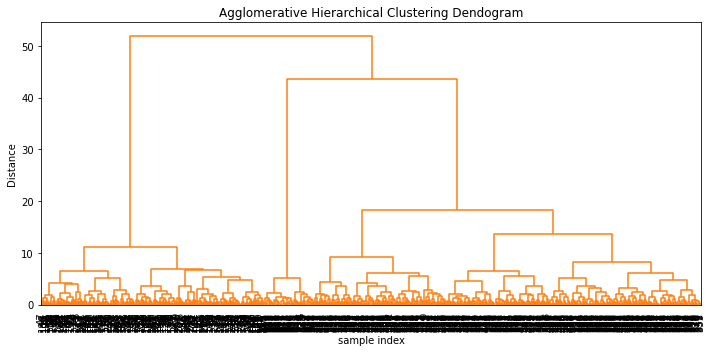

In [60]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

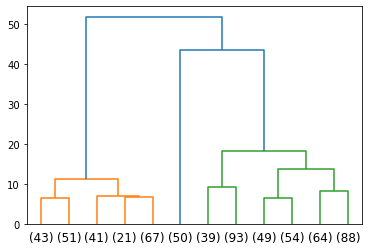

In [61]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [62]:
max_d = 20

In [63]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [64]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(df1Scaled,clusters)

0.517065019487537

In [65]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Linkage Method':['ward'], 'silhouette score': s},index={'3'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Linkage Method', 'silhouette score']]
results_model

,Linkage Method,silhouette score
1,average,0.517248
2,complete,0.516120
3,ward,0.516120


In [66]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df1Scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(df1Scaled))

c

0.6666982080229052

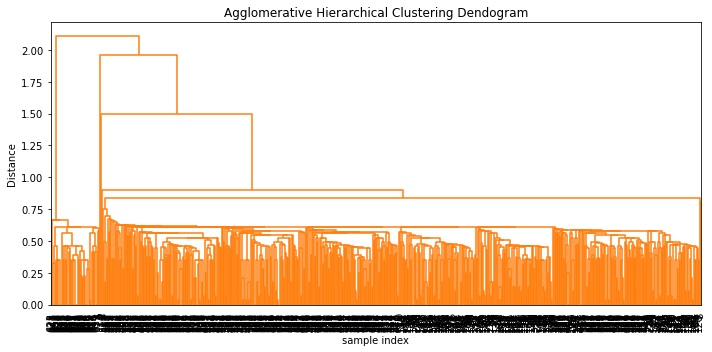

In [67]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

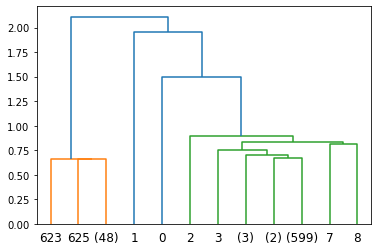

In [68]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [69]:
max_d = 2

In [70]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [71]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
s=silhouette_score(df1Scaled,clusters)
s

0.5172480049319457

In [72]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Linkage Method':['single'], 'silhouette score': s},index={'4'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Linkage Method', 'silhouette score']]
results_model

,Linkage Method,silhouette score
1,average,0.517248
2,complete,0.516120
3,ward,0.516120
4,single,0.517248


In [73]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df1Scaled, metric='euclidean', method='median')
c, coph_dists = cophenet(Z , pdist(df1Scaled))

c

0.8887160179419454

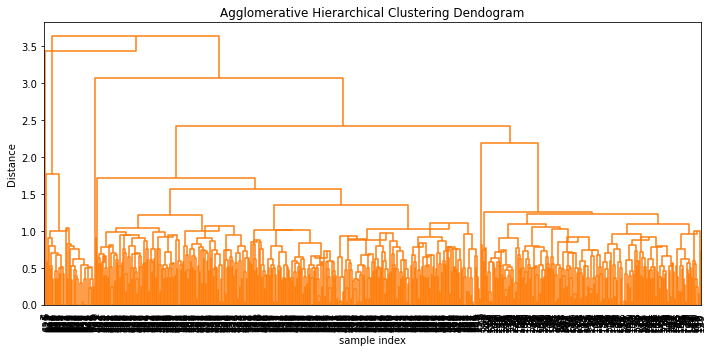

In [74]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

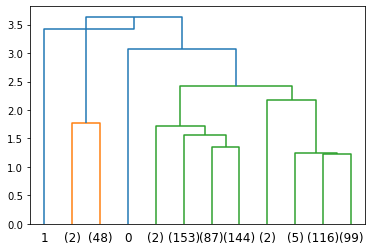

In [75]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [76]:
max_d = 2

In [77]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([5, 6, 2, 2, 1, 4, 1, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [78]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
s=silhouette_score(df1Scaled,clusters)
s

0.35743419889783856

In [79]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Linkage Method':['median'], 'silhouette score': s},index={'5'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Linkage Method', 'silhouette score']]
results_model

,Linkage Method,silhouette score
1,average,0.517248
2,complete,0.516120
3,ward,0.516120
4,single,0.517248
5,median,0.357434


### Hierarchial clustering Observation

- The best silhouette score we got using above mentioned methods is 0.517. Though it is not very close to 1 it is not bad.


- group 0 customers has 25,000 average credit limit and has 4 credit cards.
- group 1 customers has 102,660 average credit limit and has 8 credit cards.
- group 3 customers has 100,000 average credit limit ans has 2 credit cards.


- group 0 customers visits bank most. they also use online and pnone services.
- group 1 customers visits bank and make phone calls very rare. They mostly visit online.
- group 2 customers visits bank and online but they don't make phone calls.


- group 0 customers use all 3 services.
- group 1 customers visits online.
- group 2 customers visits bank and online.


- group 0 customers has credit limit of 25,000 and has 4 credit cards. Giving reward points or cashbacks make these customers do more transaction and stop buying new cards.


- group 1 customers has credit limit of 102,660 and has 8 credit cards. These customers spend more also has more cards. Increasing the credit limit of this customers will make them do more transction on single card.


- group 2 customers has credit limit of 100,000 and has 2 credit card. Thes customers are important asset for the bank. I recommend bank to increase their credit limit or lower the interest rate or also provide loyalty cards. It will make them do more transaction.


- All of these 3 groups use online more than other 2 services. So the bank has to improve online services more efficient to get more new customers.

### Comparison between Hierarchial and K means clustering

- Both the method differentiate the group very well.
- 2 groups of both the clustering are almost same.
- the 3rd group of customers found by hierarchial clustering are the potential customers for the bank. They has average credit limit of 100,000 and has only 2 credit cards.
- k means cluster 3rd group also find the good customer who maintain account very well but they don't spend much.